In [2]:
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00


In [3]:
import matplotlib as mpl

from locale import format
from dataclasses import dataclass, MISSING

import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse import identity

from google.colab import drive
drive.mount('/content/gdrive')
import sys

path_to_module = '/content/gdrive/MyDrive/ColabNotebooks/PC_param.ipynb'
sys.path.append(path_to_module)

#import gdrive.MyDrive.ColabNotebooks.PC_param # .default_parameters_network

from gdrive.MyDrive.ColabNotebooks.PC_param import default_parameters_network

pars = default_parameters_network()

Mounted at /content/gdrive
importing Jupyter notebook from /content/gdrive/MyDrive/ColabNotebooks/PC_param.ipynb
{'ae': 18.26, 'be': -5.38, 'hme': 78.67, 'ai': 21.97, 'bi': -4.81, 'hmi': 125.62, 'taue': 0.005, 'taui': 0.005, 'tauNMDA': 0.1, 'tauGABA': 0.005, 'tauAMPA': 0.002, 'gamma': 0.641, 'sigma': 0.0007, 'I0e': 0.2346, 'I0i': 0.17, 'sigmaIn': 3, 'sigmaEI': 3, 'sigmaInh': [0.2, 3], 'I_ext': 0.0, 'c_dash': 90, 'mu0': 30, 'Jext': 0.01, 'I1': 0.57, 'I2': 0.029999999999999992, 'Jee': 0.2, 'Jie': 0.2, 'Jei': 1.4, 'Jii': 6.7, 'Jin': 0.008, 'Jiq': 0.85, 'Jes': 3.5, 'Jsi': 0.12, 'Jem': 2.2, 'I_noise': array([[-1.33145457e-04],
       [ 3.48138525e-04],
       [ 7.24854726e-05],
       [-6.72948368e-04]]), 'T': 3, 'dt': 2e-05, 'r_init': 0.2, 'range_t': array([0.00000e+00, 2.00000e-05, 4.00000e-05, ..., 2.99994e+00,
       2.99996e+00, 2.99998e+00]), 'Lt': 150000, 'NumN': 20, 'f': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'In0': 0, 'InMax'

In [4]:
np.set_printoptions(threshold=sys.maxsize)


In [5]:
# @title Default title text
taue: float = pars["taue"]
ae: float = pars['ae']
be, hme, I_noise, Jee = pars['be'], pars['hme'], pars['I_noise'], pars['Jee']
taui, ai, bi, hmi, Jii, Jei, Jie = pars['taui'], pars['ai'], pars['bi'], pars['hmi'], pars['Jii'], pars['Jei'], \
                                       pars['Jie']
Jes, Jsi = pars['Jes'], pars['Jsi']
Jiq = pars['Jiq']  #0.85; #nA
Jin = pars['Jin']
tauNMDA, tauAMPA, tauGABA = pars['tauNMDA'], pars['tauAMPA'], pars['tauGABA']
gamma = pars['gamma']  # nmda coupling parameter from brunel
    # I1, I2 = pars['I1'], pars['I2']
c_dash = pars['c_dash']
sigma = pars['sigma']  #param.sigma = .0007 for Noise
I_noise = pars['sigma'] * np.random.randn(3, 1)
I1 = pars['Jext'] * pars['mu0'] * (1 + pars['c_dash'] / 100)
I2 = pars['Jext'] * pars['mu0'] * (1 - pars['c_dash'] / 100)

sigmaIn = pars['sigmaIn']

    #Input parameters
In0 = pars['In0']       #% Spontaneous firing rate of input populations (Hz)
InMax = pars['InMax']   #% Max firing rate of input populations (Hz)
Iq0 = pars['Iq0']       #% Spontaneous firing rate of feedback populations (Hz)
IqMax = pars['IqMax']

In [9]:
f = [10]
End_ISI = 1 #s
ISI = .199 #s
stim_dur = .05 #s 50ms
dur = 1 #0.4
dt = 1e-3
f_instant = np.zeros((int(End_ISI / dt)+1, 1))

StimSeq =np.vstack((np.ones(int(stim_dur / dt)).reshape(int(stim_dur/dt), 1), np.zeros(int(ISI/dt)).reshape(int(ISI/dt), 1)))
StimSeq.shape

lenStim = int(dur / dt)
numberStimSeq = int(lenStim / StimSeq.shape[0])
print(lenStim, numberStimSeq)

1000 4


In [10]:
total_StimSeq = np.array(list((StimSeq)) * numberStimSeq)
total_StimSeq = total_StimSeq.astype(int)

Expected_Stim_seq =np.array(total_StimSeq* f).astype(int)
Expected_Stim_seq[0]

Zeros = np.zeros((int(End_ISI / dt), 1))

fx_array = np.vstack((Expected_Stim_seq, Zeros))
f_stim = np.vstack((f_instant, fx_array))
f_stim = f_stim[1:]

In [11]:
StimSeq = [[1], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
len(StimSeq)

10

In [ ]:
#creation stimuli array
#199 should be replaced by ISI/dt


1000 5


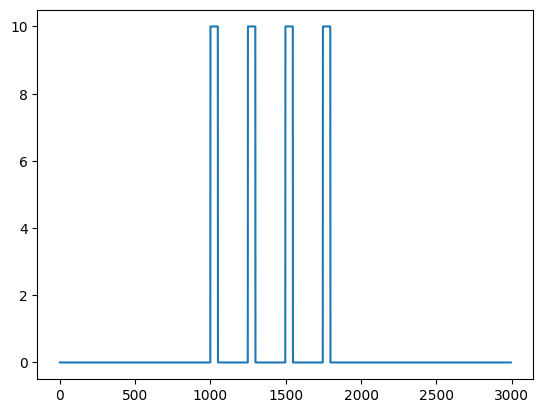

In [13]:
plt.plot(np.arange(0, 2996),f_stim[:,0])
#plt.xlim([990, 1230])

In [ ]:
fx_array = np.concatenate(((np.array(N) * [10]), #just 1 frequency of 8 . # inter-stim interval is aslong as stim interval
                               np.zeros((int(ISI / dt), 1))))   # so I get 1 list with 1000 lists containing 8 and 1000 lists containing

f_stim = np.vstack((f_instant, fx_array))
f_stim = f_stim[1:]

In [ ]:
np.concatenate((np.array(N) * [10], #just 1 frequency of 8 . # inter-stim interval is aslong as stim interval
                  np.zeros((int(ISI / dt), 1))), axis =0)


In [ ]:
np.ones((int(dur / dt), 1)) * [10, 0 ,0 ,0]

array([[10.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.],
       ...,
       [10.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.]])

In [ ]:
pos = np.where(f_stim > 0)
pos

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
seq = [10, 0 ,0 ,0]
for fx in seq:
  fx_array = np.concatenate(((np.ones((int(dur / dt), 1)) * fx), #just 1 frequency of 8 . # inter-stim interval is aslong as stim interval
                               np.zeros((int(ISI / dt), 1))))   # so I get 1 list with 1000 lists containing 8 and 1000 lists containing 0
f_stim = np.vstack((f_instant, fx_array)) #stack vertically these arrays # [0] *1000 , [8]*1000, [0]*1000
f_stim = f_stim[1:] #1400*1

In [ ]:
f_stim.shape

(3000, 1)